<a href="https://colab.research.google.com/github/SamLizotte/Machine-Learning-to-Detect-Alzheimers-Disease/blob/main/Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/Data/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Non_Demented/non_1395.jpg  
  inflating: Dataset/Non_Demented/non_1396.jpg  
  inflating: Dataset/Non_Demented/non_1397.jpg  
  inflating: Dataset/Non_Demented/non_1398.jpg  
  inflating: Dataset/Non_Demented/non_1399.jpg  
  inflating: Dataset/Non_Demented/non_14.jpg  
  inflating: Dataset/Non_Demented/non_140.jpg  
  inflating: Dataset/Non_Demented/non_1400.jpg  
  inflating: Dataset/Non_Demented/non_1401.jpg  
  inflating: Dataset/Non_Demented/non_1402.jpg  
  inflating: Dataset/Non_Demented/non_1403.jpg  
  inflating: Dataset/Non_Demented/non_1404.jpg  
  inflating: Dataset/Non_Demented/non_1405.jpg  
  inflating: Dataset/Non_Demented/non_1406.jpg  
  inflating: Dataset/Non_Demented/non_1407.jpg  
  inflating: Dataset/Non_Demented/non_1408.jpg  
  inflating: Dataset/Non_Demented/non_1409.jpg  
  inflating: Dataset/Non_Demented/non_141.jpg  
  inflating: Dataset/Non_Demented/non_1410.jpg  
  inflating: Dataset/N

In [ ]:
import glob
import cv2
import numpy as np
verymild_images = []
files = glob.glob("Dataset/Very_Mild_Demented/*.jpg")

# turning data into arrays
# non demented = 0; very mild demented = 1; mild demented = 2; moderate demented = 3
for filename in files:
  image = cv2.imread(filename)
  verymild_images.append(image)

verymild_array = np.array(verymild_images)

y_verymild = np.ones(verymild_array.shape[0])

mild_images = []
mildfile = glob.glob("Dataset/Mild_Demented/*.jpg")

for filename in mildfile:
  image = cv2.imread(filename)
  mild_images.append(image)

mild_array = np.array(mild_images)

y_mild = np.ones(mild_array.shape[0]) * 2

moderate_images = []
mod_files = glob.glob("Dataset/Moderate_Demented/*.jpg")

for filename in mod_files:
  image = cv2.imread(filename)
  moderate_images.append(image)

moderate_array = np.array(moderate_images)

y_moderate = np.ones(moderate_array.shape[0]) * 3

non_demented_images = []
nondem_files = glob.glob("Dataset/Non_Demented/*.jpg")

for filename in nondem_files:
  image = cv2.imread(filename)
  non_demented_images.append(image)

nondem_array = np.array(non_demented_images)

y_nondem = np.ones(nondem_array.shape[0]) * 0

In [ ]:
mri_images = np.concatenate((verymild_array,mild_array,moderate_array,nondem_array), casting="same_kind")

y_mri_images = np.concatenate((y_verymild, y_mild, y_moderate, y_nondem))

In [ ]:
def normalize_image(image):


  return (image - np.min(image)) / (np.max(image) - np.min(image))

norm_mri = []
for img in mri_images:
  norm_mri.append(normalize_image(img))

norm_mri = np.array(norm_mri)
norm_mri.shape

(6400, 128, 128, 3)

In [ ]:
#import train test split to prepare data for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(norm_mri, y_mri_images, random_state=None, shuffle=True, stratify=None)

#resizing X arrays to fit sklearn formatting
X_train = np.reshape(X_train,(4800,49152))
X_test = np.reshape(X_test, (1600,49152))

In [ ]:
#importing accuracy tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

#__.score is the same as accuracy_score(__)

In [ ]:
#models start here
#decision tree model

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
#decision tree prediction
y_true = clf.predict(X_test)

In [ ]:
#decision tree accuracy
print(accuracy_score(y_true,y_test))

print(accuracy_score(y_true,y_test,normalize=False))

0.686875
1099


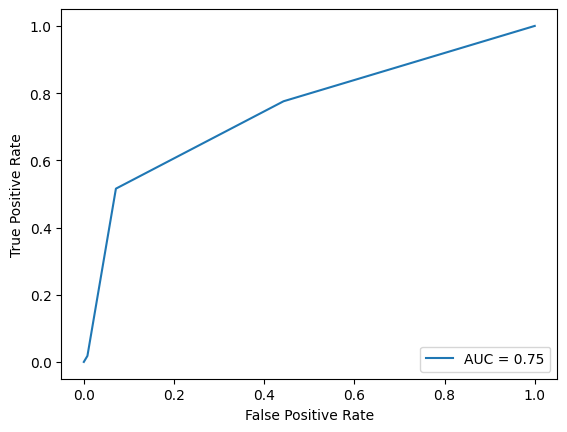

In [ ]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_true, y_test, pos_label=2)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()

plt.show()

In [ ]:
#decision tree confusion matrix
# order is very mild, mild, moderate, non-demented
# model is confusing very mild and mild
confusion_matrix(y_true,y_test)

array([[625, 128,  42,   4],
       [128, 389,  36,   5],
       [ 38,  49, 140,   2],
       [  2,   4,   3,   5]])

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

#max iterations as 1000 takes 30 minutes. possibly has overfitting as well
clf2 = LogisticRegression(max_iter=2500)

In [ ]:
#logistic model training
clf2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2500)

In [ ]:
#logistic model testing
clf2.predict(X_test)

array([0., 0., 0., ..., 0., 1., 1.])

In [ ]:
#logistic model score
clf2.score(X_test,y_test)

#max iter 250

0.97

In [ ]:
#logistic model accuracy. same as score but written differently
y_true = clf2.predict(X_test)
print(accuracy_score(y_true,y_test))

0.9675


[[794  14   8   0]
 [ 20 543   4   0]
 [  5   1 193   0]
 [  0   0   0  18]]


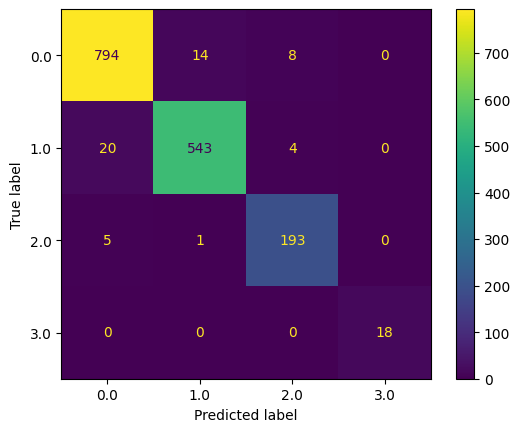

In [ ]:
import matplotlib.pyplot as plt

print(confusion_matrix(y_true,y_test))

ConfusionMatrixDisplay.from_predictions(y_true,y_test)

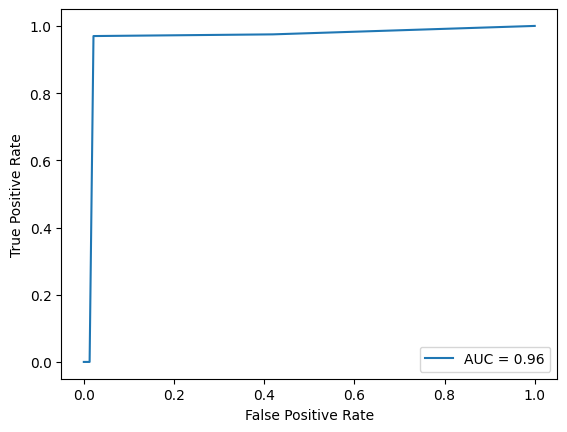

In [ ]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_true, y_test, pos_label=2)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()

plt.show()

In [ ]:
#neural network model
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf3 = MLPClassifier(hidden_layer_sizes=(200,100),max_iter=500)

In [ ]:
clf3.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=500)

In [ ]:
y_true = clf3.predict(X_test)

In [ ]:
print(accuracy_score(y_true, y_test))
(precision_score(y_true, y_test, average=None))
(recall_score(y_true,y_test,average=None))
(f1_score(y_true,y_test,average=None))

0.694375


array([0.59836809, 0.71949686, 0.82226981, 0.85      ])

In [ ]:
#hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

tup = dict(hidden_layer_sizes=[(100)])

hyperparam = RandomizedSearchCV(clf3, tup)
grid = GridSearchCV(clf3, tup)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(200,), max_iter=500),
             param_grid={'hidden_layer_sizes': [100]})

In [ ]:
grid_results = grid.predict(X_test)

In [ ]:
grid_results

array([1., 2., 0., ..., 1., 1., 1.])

In [ ]:
accurate = grid.score(X_test,y_test)
#accuracy ~68% first time overall

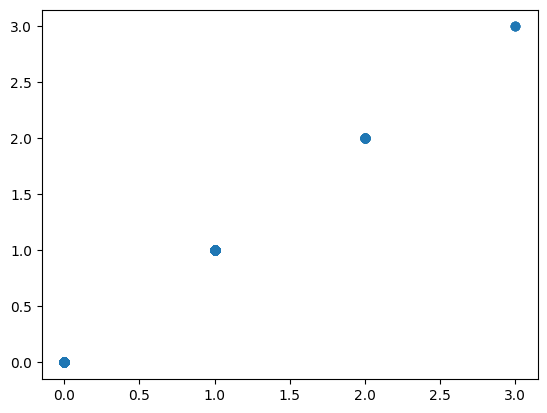

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(grid_results,grid_results)

[[758  72  17   0]
 [ 24 484  17   0]
 [  4   3 201   0]
 [  0   0   0  20]]


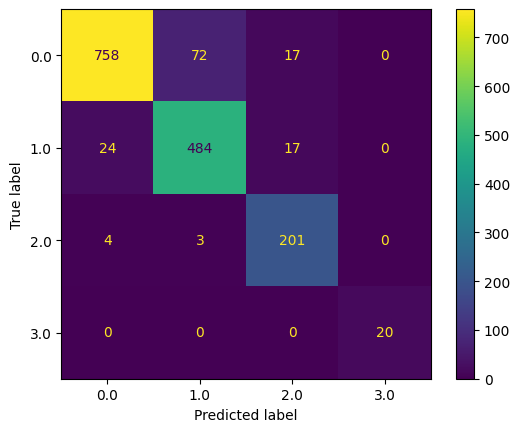

In [ ]:
import matplotlib.pyplot as plt

print(confusion_matrix(y_true,y_test))

ConfusionMatrixDisplay.from_predictions(y_true,y_test)

plt.show()

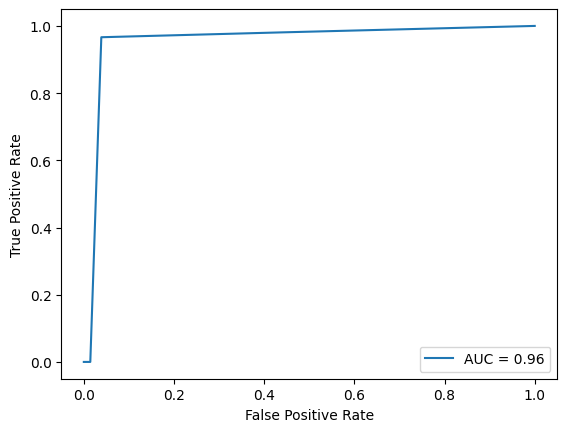

In [ ]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_true, y_test, pos_label=2)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()

plt.show()